# Dijkstra's with all possible s-t paths

This code will present the user with the shortest path and all possible s-t paths

In [2]:
import random
from igraph import Graph, plot
from graphviz import Digraph

In [3]:
#takes input of graph and m value for randomized arc lengths
def create_graph():
    #input of nodes
    node_connections = []
    #splitting and uppercasing nodes input
    nodes = tuple(str(input("Please enter all nodes (Comma seperated, e.g., 'S, E, G, H, U, T')\nYour Input: ")).split(', '))
    print(f"All nodes: {nodes}")
    #loop through nodes and get their connections
    for n in nodes:
        if n != 'T':
            connections = str(input(f"Please enter all nodes that node {n} connects to, from left to right (Comma seperated, e.g., 'H, G, T')\nYour Input: ")).split(', ')
            node_connections.append(connections)
        else:
            break    
    for i in range(len(nodes)-1):
        print(f"Node {nodes[i]} connects to {node_connections[i]}") 
    #getting M value (upper bound of randomized arc weights)
    m = int(input("Please Enter Your m Value(upper bound of randomized arc weights): "))
    
    #storing dict representation of connections
    all_conns = []
    #loop through node connections and create temp dicts with node:weight
    for n in node_connections:
        temp_dict = {}
        for i in n:
            temp_dict[i] = random.randint(1, m)
        all_conns.append(temp_dict)
    
    #creation of graph dict
    graph = {}
    for i in range(len(nodes)-1):
        graph[nodes[i]] = all_conns[i]
    graph['T'] = {}
    return (graph, m)

In [26]:
#conversion to igraph to present shortest graph and all s-t paths possible
def solve_graph(graph):
    #retrieving nodes, edges and weights
    labels = [i for i in graph.keys()]
    #getting weights of arcs in order for edges
    nested_weights = [[i for i in j.values()] for j in graph.values()]
    #flattening nested list
    weights = [weight for i in nested_weights for weight in i]
    #need to loop through dict, pairing key with subkeys in tuples - e.g., (S, E), (S, G)
    edgs = [[(i[0], j) for j in i[1].keys()] for i in graph.items()]
    pre_edges = [edge for i in edgs for edge in i]
    #encode vertices from 0-len(nodes)
    vertex_ids = {labels[i]: i for i in range(len(labels))}
    edges = []
    for edge in pre_edges:
        edges.append((vertex_ids[edge[0]], vertex_ids[edge[1]]))
    #Create graph
    g = Graph(directed=True)

    #add vertices
    g.add_vertices(len(labels))
    
    #add edges between nodes
    g.add_edges(edges)

    #adding ids and labels to vertices
    for i in range(len(g.vs)):
        g.vs[i]['id']=i
        g.vs[i]['label']=labels[i]

    #adding weights and edge labels
    g.es['weight'] = weights
    g.es['label'] = weights
    
    #getting all s-t paths
    all_paths = g.get_all_simple_paths(0, len(labels)-1)
    
    #shortest path with built in dijkstra's
    shortest = g.get_shortest_paths(0, len(labels)-1)
    
    #getting minimum path
    dijkstra = g.shortest_paths_dijkstra(source=0, target=len(labels)-1, weights=weights, mode='out')
    length = int(dijkstra[0][0])
    
    #showing shortest path retrieved from Dijkstra's
    print(f"Shortest S-T (Least amount of steps): {convert(shortest[0], labels)}\n\nDijkstra's shortest Distance from S-T: {length}\n")
    
    #showing all possible s-t paths
    paths = [convert(i, labels) for i in all_paths]
    #print(f"All possible S-T paths: {paths}")
    print(f"Amount of unique S-T paths: {len(paths)}")
    
    return (weights, labels, all_paths, shortest, length, g, dijkstra)

In [5]:
#function that takes a path as integers and returns as nodes
def convert(path, nodes):
    encoding = {i:nodes[i] for i in range(len(nodes))}
    new_path = [encoding[i] for i in path]
    #return f"Path: {', '.join(new_path)}"
    return new_path

In [6]:
graph, m = create_graph()

Please enter all nodes (Comma seperated, e.g., 'S, E, G, H, U, T')
Your Input: S, E, G, W, J, K, T
All nodes: ('S', 'E', 'G', 'W', 'J', 'K', 'T')
Please enter all nodes that node S connects to, from left to right (Comma seperated, e.g., 'H, G, T')
Your Input: E, G
Please enter all nodes that node E connects to, from left to right (Comma seperated, e.g., 'H, G, T')
Your Input: W, J
Please enter all nodes that node G connects to, from left to right (Comma seperated, e.g., 'H, G, T')
Your Input: J
Please enter all nodes that node W connects to, from left to right (Comma seperated, e.g., 'H, G, T')
Your Input: K, T
Please enter all nodes that node J connects to, from left to right (Comma seperated, e.g., 'H, G, T')
Your Input: K
Please enter all nodes that node K connects to, from left to right (Comma seperated, e.g., 'H, G, T')
Your Input: T
Node S connects to ['E', 'G']
Node E connects to ['W', 'J']
Node G connects to ['J']
Node W connects to ['K', 'T']
Node J connects to ['K']
Node K co

### Plotting Randomized User-Inputted Graph

In [7]:
#graph data representation
graph

{'S': {'E': 44, 'G': 32},
 'E': {'W': 43, 'J': 30},
 'G': {'J': 10},
 'W': {'K': 33, 'T': 26},
 'J': {'K': 27},
 'K': {'T': 21},
 'T': {}}

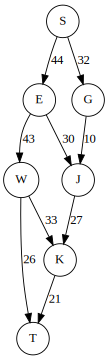

In [8]:
#creating graph
g = Digraph('UsersDigraph', filename='UsersDigraph.gv')
g.attr(size='8,5')
g.attr('node', shape='circle')
#loop through keys to get all nodes
for node in graph.keys():
    g.node(node)
#nested loop to create all edges
for node, connections in graph.items():
    for con_node, arc_length in connections.items():
        g.edge(node, con_node, label=str(arc_length))
#showing graph
g

### Getting Shortest Path

In [27]:
solved = solve_graph(graph)

Shortest S-T (Least amount of steps): ['S', 'E', 'W', 'T']

Dijkstra's shortest Distance from S-T: 90

Amount of unique S-T paths: 4


### Plotting Minimum Path iGraph

In [1]:
#g = solved[5]
#plot(g.subgraph([int(i) for i in solved[3][0]]))

### Plotting Minimum Path Graphviz

In [15]:
#tuple loop through shortest path
shortest = convert(solved[3][0], solved[1])
i = 0
tuples = []
while i<len(shortest)-1:
    tuples.append(shortest[i:i+2])
    i += 1
#list of all arcs needed for minimum
arcs = [tuple(i) for i in tuples]

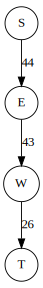

In [16]:
#creating graph
g = Digraph('ShortestPath', filename='ShortestPath.gv')
g.attr(size='4,4')
g.attr('node', shape='circle')
#loop through keys to get all nodes
for node in shortest:
    g.node(node)
#loop to create edges
for arc in arcs:
    #print(f"Initial arc: {arc[0]}, connected to: {arc[1]}, with weight: {graph[arc[0]][arc[1]]}")
    g.edge(arc[0], arc[1], label=str(graph[arc[0]][arc[1]]))
#showing graph
g

### Minimum Spanning Tree

In [16]:
#g = solved[5]
#plot(g.spanning_tree())

## Ta-Shma's Estimation using Isolation Lemma
The probability that there will be a unique minimum path in the set of all unique paths is given from the equation:
(1-1/m)^n, where m is the user entered maximum of the randomized arc lengths, and n is the amount of unique paths in the set of all possible paths in the user entered graph


In [25]:
print(f"Ta Shma's Probability Estimation that this given smallest path is unique: {round(1 - (1/m)**len(solved[1]), 2)*100}%")

Ta Shma's Probability Estimation that this given smallest path is unique: 100.0%
